In [386]:
import warnings
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore")

In [387]:
df=pd.read_csv(r"\Users\Family\Downloads\archive (2)\hou_all.csv",header=None)

In [388]:
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                'DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE','v']
df.columns = feature_names  

In [389]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,v
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non_retial business acres per town

CHAS: Charles River dummy variable (equal 1 if track nbounds river and 0 otherwise)

NOX: nitric oxides concetration (parts per 10 million)

RM: average number of rooms per dwelling 

AGE: proportionrtion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(BK - 0.63)^2 where BK is the proportion of blacks by town

LSTAT: % lower status of the population

PRICE (MEDV): Median value of owner-occupied homes in $1000's
    

In [390]:
x=df.drop(['PRICE','v'],axis=1)
y=df['PRICE']

In [391]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [392]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [393]:
model = Sequential()
model.add(Dense(128,input_dim=13,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='linear'))

In [394]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [395]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               1792      
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [396]:
history=model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 22ms/step - loss: 569.2264 - mae: 21.7913 - val_loss: 469.7433 - val_mae: 19.9824
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 490.5283 - mae: 19.9260 - val_loss: 390.5444 - val_mae: 17.9719
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 394.4857 - mae: 17.5141 - val_loss: 292.8559 - val_mae: 15.2363
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 282.2119 - mae: 14.3075 - val_loss: 185.8070 - val_mae: 11.7120
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 170.5967 - mae: 10.5182 - val_loss: 96.8877 - val_mae: 7.7566
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 94.8148 - mae: 7.5523 - val_loss: 50.9057 - val_mae: 5.1920
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 62.9118 - mae: 6.1733 - val_loss: 36.0520 - val_mae: 4.3950
Epoch 8/100
11/11 [==============================]

11/11 [==============================] - 0s 4ms/step - loss: 8.8632 - mae: 2.1455 - val_loss: 14.6228 - val_mae: 2.6898
Epoch 63/100
11/11 [==============================] - 0s 4ms/step - loss: 8.8318 - mae: 2.1513 - val_loss: 14.0853 - val_mae: 2.6427
Epoch 64/100
11/11 [==============================] - 0s 4ms/step - loss: 8.7620 - mae: 2.1307 - val_loss: 13.7966 - val_mae: 2.6089
Epoch 65/100
11/11 [==============================] - 0s 4ms/step - loss: 8.6409 - mae: 2.1153 - val_loss: 13.4717 - val_mae: 2.5909
Epoch 66/100
11/11 [==============================] - 0s 4ms/step - loss: 8.5622 - mae: 2.1047 - val_loss: 13.7432 - val_mae: 2.5840
Epoch 67/100
11/11 [==============================] - 0s 6ms/step - loss: 9.5067 - mae: 2.1914 - val_loss: 15.6006 - val_mae: 2.6844
Epoch 68/100
11/11 [==============================] - 0s 7ms/step - loss: 10.3017 - mae: 2.4259 - val_loss: 15.6628 - val_mae: 2.9115
Epoch 69/100
11/11 [==============================] - 0s 5ms/step - loss: 9.6525 

In [397]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)

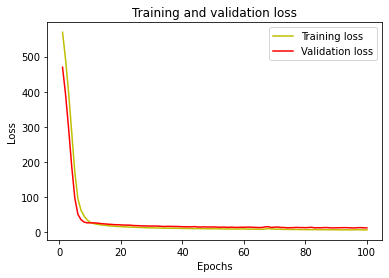

In [398]:
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [399]:
acc = history.history['mae']
val_acc = history.history['val_mae']

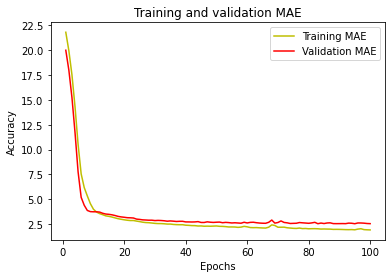

In [400]:
plt.plot(epochs,acc,'y',label='Training MAE')
plt.plot(epochs,val_acc,'r',label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [401]:
predictions = model.predict(x_train_scaled[:5])
print("Predicted values are: ",predictions)
print("real values are: ",y_train[:5])

1/1 [==============================] - 0s 54ms/step
Predicted values are:  [[10.415013]
 [19.036076]
 [18.690876]
 [11.598321]
 [18.761002]]
real values are:  477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: PRICE, dtype: float64


In [402]:
np.random.seed(0)

In [403]:
mse_neural, mae_neural = model.evaluate(x_test_scaled,y_test)
print('Mean squared error from neural net: ',mse_neural)
print('Mean absolute error from neural net: ',mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 11.3964 - mae: 2.2383
Mean squared error from neural net:  11.396370887756348
Mean absolute error from neural net:  2.2382733821868896


In [404]:
model=RandomForestRegressor(n_estimators=60,random_state=42)
model.fit(x_train_scaled,y_train)
y_pred_RF=model.predict(x_test_scaled)
mse_RF = mean_squared_error(y_test,y_pred_RF)
mae_RF=mean_absolute_error(y_test,y_pred_RF)
print('Mean squared error from random forest: ',mse_RF)
print('Mean absolute error from random forest: ',mae_RF)

Mean squared error from random forest:  7.568286165577344
Mean absolute error from random forest:  2.0302287581699345


In [405]:
tree=DecisionTreeRegressor(random_state=0,max_depth=5,min_samples_leaf=4)
tree.fit(x_train_scaled,y_train)
y_pred_tree=tree.predict(x_test_scaled)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt=mean_absolute_error(y_test,y_pred_tree)
print('Mean squared error from decision tree: ',mse_dt)
print('Mean absolute error from decision tree: ',mae_dt)

Mean squared error from decision tree:  10.344628592035763
Mean absolute error from decision tree:  2.5312140295562244


In [406]:
lr_model=linear_model.LinearRegression()
lr_model.fit(x_train_scaled,y_train)
y_pred_lr=lr_model.predict(x_test_scaled)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr=mean_absolute_error(y_test,y_pred_lr)
print('Mean squared error from linear regression: ',mse_lr)
print('Mean absolute error from linear regression: ',mae_lr)

Mean squared error from linear regression:  24.29111947497352
Mean absolute error from linear regression:  3.189091965887848


In [407]:
feature_list = list(x.columns)
feature_imp=pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

RM         0.511794
LSTAT      0.299891
DIS        0.064036
CRIM       0.036261
PTRATIO    0.016425
NOX        0.016403
TAX        0.014468
AGE        0.013584
B          0.012364
INDUS      0.008746
RAD        0.003285
ZN         0.001626
CHAS       0.001118
dtype: float64